# Introduction

In the following exercises I will work with the data exported from my iPhone's Apple Health app as well as the data exported from another app from my phone called Sleep Cycle. Both apps have been gathering data related to my health and sleeping habits, so it made sense to me to do some simple analyses and explore the datasets.

The questions I would like to answer:
 - How much do I walk regularly? Yearly as well as monthly.
 - Do I walk more or less on weekends?
 - In which season do I walk more or less? Are the significant differences in my walking habits?
 - How does my sleep relate to the daily distance I cover?
 - Do I sleep better in the different seasons?
 
First I will import and clean both datasets. After cleaning, I will explore them with simple charts and summarise them with basic statistical metrics. Lastly, I will combine them together and answer the questions listed above.

# 0. Importing Packages

Before I can start any work, I need to import the main packages I inted to use for my analysis.

In [1]:
# Importing packages

import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
from pandas import DataFrame

# 1. The 'Distance Dataset'

# 1.1. Importing and cleaning the 'Distance Dataset'

In this segment I will now import the Apple Health app's dataset which has records of every time my iPhone observed me walking. Since the only numerical value this dataset has is the distance I covered in kilometers, I will call this the 'Distance Dataset'.

After importing it, I will examine it's columns, observations, missing values and if needed clean it so that it is prepared for analysis.

In [2]:
# Importing the dataset from my local library
distance = pd.read_csv('/Users/zsoltdiossy/Documents/ProjectDataScience/Apple_Health_Analytics/data/distance_data.csv', sep = ';', header = 1)

# Calling .head() to have a sense of the dataset
distance.head()

,type,sourcename,unit,creationdate,startdate,enddate,value,sourceversion,device
0,HKQuantityTypeIdentifierDistanceWalkingRunning,Zsolt's iPhone,km,2015-05-13 20:46:26 +0200,2015-05-13 19:02:19 +0200,2015-05-13 19:08:17 +0200,0.24733,NaN,NaN
1,HKQuantityTypeIdentifierDistanceWalkingRunning,Zsolt's iPhone,km,2015-05-13 20:46:26 +0200,2015-05-13 19:08:17 +0200,2015-05-13 19:13:17 +0200,0.36488,NaN,NaN
2,HKQuantityTypeIdentifierDistanceWalkingRunning,Zsolt's iPhone,km,2015-05-13 20:46:26 +0200,2015-05-13 19:13:17 +0200,2015-05-13 19:15:17 +0200,0.15213,NaN,NaN
3,HKQuantityTypeIdentifierDistanceWalkingRunning,Zsolt's iPhone,km,2015-05-13 20:46:26 +0200,2015-05-13 19:15:17 +0200,2015-05-13 19:20:31 +0200,0.01725,NaN,NaN
4,HKQuantityTypeIdentifierDistanceWalkingRunning,Zsolt's iPhone,km,2015-05-13 20:46:26 +0200,2015-05-13 19:20:31 +0200,2015-05-13 19:23:01 +0200,0.08930,NaN,NaN


In [3]:
# Reviewing the column types
distance.dtypes

type              object
sourcename        object
unit              object
creationdate      object
startdate         object
enddate           object
value            float64
sourceversion     object
device            object
dtype: object

In the dataset we have 3 column with dates: creationdate, startdate, enddate. These all have object types, which I will now change to date type. Additionally I will use the enddate column to create 2 specific columns:
 - date: to have a dedicated date column to work with during my analysis
 - day: to have a dedicated column with the name of the day to work with during my analysis
I think I could use either startdate or enddate to as my 2 new columns, it does not seem to make a big difference. Creationdate however could be different, because it seems to me that that is the time when my iPhone synced the data and created the observations. The enddate gives a more accurate and granular view.

I could probably be fine having just 1 date column in a format I am comfortable with, however I feel safer keeping the original columns and having the 2 extra ones at hand as well.

In [4]:
# Converting date columns to date type and adding extra columns for future calculations
distance['creationdate'] = pd.to_datetime(distance['creationdate'], infer_datetime_format = True)
distance['startdate'] = pd.to_datetime(distance['startdate'], infer_datetime_format = True)
distance['enddate'] = pd.to_datetime(distance['enddate'], infer_datetime_format = True)
distance['date'] = pd.to_datetime(distance['enddate'].dt.strftime('%Y/%m/%d'))
distance['day'] = distance['date'].dt.strftime('%A')

# Reviewing the column types & calling .head()
print(distance.dtypes)
distance.head(10)

type                                            object
sourcename                                      object
unit                                            object
creationdate     datetime64[ns, pytz.FixedOffset(120)]
startdate        datetime64[ns, pytz.FixedOffset(120)]
enddate          datetime64[ns, pytz.FixedOffset(120)]
value                                          float64
sourceversion                                   object
device                                          object
date                                    datetime64[ns]
day                                             object
dtype: object


,type,sourcename,unit,creationdate,startdate,enddate,value,sourceversion,device,date,day
0,HKQuantityTypeIdentifierDistanceWalkingRunning,Zsolt's iPhone,km,2015-05-13 20:46:26+02:00,2015-05-13 19:02:19+02:00,2015-05-13 19:08:17+02:00,0.24733,NaN,NaN,2015-05-13,Wednesday
1,HKQuantityTypeIdentifierDistanceWalkingRunning,Zsolt's iPhone,km,2015-05-13 20:46:26+02:00,2015-05-13 19:08:17+02:00,2015-05-13 19:13:17+02:00,0.36488,NaN,NaN,2015-05-13,Wednesday
2,HKQuantityTypeIdentifierDistanceWalkingRunning,Zsolt's iPhone,km,2015-05-13 20:46:26+02:00,2015-05-13 19:13:17+02:00,2015-05-13 19:15:17+02:00,0.15213,NaN,NaN,2015-05-13,Wednesday
3,HKQuantityTypeIdentifierDistanceWalkingRunning,Zsolt's iPhone,km,2015-05-13 20:46:26+02:00,2015-05-13 19:15:17+02:00,2015-05-13 19:20:31+02:00,0.01725,NaN,NaN,2015-05-13,Wednesday
4,HKQuantityTypeIdentifierDistanceWalkingRunning,Zsolt's iPhone,km,2015-05-13 20:46:26+02:00,2015-05-13 19:20:31+02:00,2015-05-13 19:23:01+02:00,0.08930,NaN,NaN,2015-05-13,Wednesday
5,HKQuantityTypeIdentifierDistanceWalkingRunning,Zsolt's iPhone,km,2015-05-13 20:46:26+02:00,2015-05-13 19:26:21+02:00,2015-05-13 19:32:21+02:00,0.02410,NaN,NaN,2015-05-13,Wednesday
6,HKQuantityTypeIdentifierDistanceWalkingRunning,Zsolt's iPhone,km,2015-05-13 21:57:12+02:00,2015-05-13 20:55:28+02:00,2015-05-13 21:00:30+02:00,0.35133,NaN,NaN,2015-05-13,Wednesday
7,HKQuantityTypeIdentifierDistanceWalkingRunning,Zsolt's iPhone,km,2015-05-13 21:57:12+02:00,2015-05-13 21:00:30+02:00,2015-05-13 21:05:27+02:00,0.33335,NaN,NaN,2015-05-13,Wednesday
8,HKQuantityTypeIdentifierDistanceWalkingRunning,Zsolt's iPhone,km,2015-05-13 21:57:12+02:00,2015-05-13 21:20:00+02:00,2015-05-13 21:26:00+02:00,0.01152,NaN,NaN,2015-05-13,Wednesday
9,HKQuantityTypeIdentifierDistanceWalkingRunning,Zsolt's iPhone,km,2015-05-13 21:57:12+02:00,2015-05-13 21:26:00+02:00,2015-05-13 21:31:48+02:00,0.09242,NaN,NaN,2015-05-13,Wednesday


It seems like we have some columns which will be irrelevant for our analysis. These are the type and sourcename columns, where we only have a single value, as well as the sourceversion and device columns, which have no data. The type column indicates basically the name of the dataset I exported from the Health app, while the sourcename indicates which device recorded the observations - I only have 1 device. The sourceversion and device columns have no value for some reason, however I do not intend to use such attributes for my analysis. I will remove these columns, so that my dataset is more lean.

Lastly I will rename the value column to km, and simultaneosuly remove the unit column to have a leaner and tidier dataset.

In [5]:
# Remove type, sourcename, sourceversion and device columns
distance.drop(['type', 'sourcename', 'sourceversion', 'device'], inplace = True, axis = 1)

# Rename 'value' to 'km'
distance.rename(columns = {'value':'km'}, inplace = True)

# Check if columns are deleted and renamed
print(distance.columns)

Index(['unit', 'creationdate', 'startdate', 'enddate', 'km', 'date', 'day'], dtype='object')


Now that our dataset only has relevant columns, and all of the columns have the preferred type, lets check the quality of our data.

In [6]:
# Check if we have missing values
distance.isna().sum()

unit            0
creationdate    0
startdate       0
enddate         0
km              0
date            0
day             0
dtype: int64

# 1.2. Basic summaries of the 'Distance Dataset'

After cleaning our dataset, I will now call some quick summary statistics to have a better sense of what I am going to analyse.

In [7]:
# summary statistics of our only numerical variable ('km')
distance['km'].describe()

count    61931.000000
mean         0.115182
std          0.146722
min          0.000050
25%          0.017880
50%          0.059780
75%          0.167510
max          7.740810
Name: km, dtype: float64

The dataset has almost 62 thousand observations, with an average distance of 0.1 km (100 meters) and a minimum and maximum value of 0.00005km and 7.7km respectively. It is important to highlight that these summary statistics are using observations, i.e. not daily distances. As we saw before, observations are short, and 1 days has multiple observations. I will repeat this summary once I aggregated the data on a daily level.

In [8]:
# basic information of our dataframe
distance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61931 entries, 0 to 61930
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype                                
---  ------        --------------  -----                                
 0   unit          61931 non-null  object                               
 1   creationdate  61931 non-null  datetime64[ns, pytz.FixedOffset(120)]
 2   startdate     61931 non-null  datetime64[ns, pytz.FixedOffset(120)]
 3   enddate       61931 non-null  datetime64[ns, pytz.FixedOffset(120)]
 4   km            61931 non-null  float64                              
 5   date          61931 non-null  datetime64[ns]                       
 6   day           61931 non-null  object                               
dtypes: datetime64[ns, pytz.FixedOffset(120)](3), datetime64[ns](1), float64(1), object(2)
memory usage: 3.3+ MB


# 1.3. Exploring the dataset and creating subsets of data

In the following exercises I will aggregate my data on different level, and prepare it for analysis and visualization by creating subsets of data - keeping in mind the questions that I set out to answer earlier.

In [9]:
# Yearly aggregation - Q: HOW MUCH DO I WALK REGULARLY
yearly_distance = distance.groupby(distance['date'].dt.year).agg({'km':'sum'})

# Viewing the dataset
yearly_distance

,km
date,
2015,1081.143441
2016,1428.012951
2017,1619.677883
2018,985.373128
2019,1184.758224
2020,713.882366
2021,120.485546


I got my iPhone some time in May 2015 so that year's data is not a full year. The same applies to 2021, as I am doing this project in May of this year. In order to compare the same time periods, I will filter out these two years from my new dataframe.

It would also make sense to rename the index, since we only indicate the year now.

In [10]:
# Filtering out years and renaming the index
years = ['2016','2017','2018','2019','2020']
yearly_distance = yearly_distance[yearly_distance.index.isin(years)]
yearly_distance.index.names = ['year']

yearly_distance

,km
year,
2016,1428.012951
2017,1619.677883
2018,985.373128
2019,1184.758224
2020,713.882366


In [11]:
# Monthly aggregation - Q: HOW MUCH DO I WALK REGULARLY
monthly_distance = distance.groupby([distance['date'].dt.year, distance['date'].dt.month]).agg({'km':'sum'})
monthly_distance.index.names = ['year', 'month']

# Once again filter out the years that are out of scope
monthly_distance = monthly_distance[monthly_distance.index.isin(years, level = 0)]

# Calling head to see the datatset
monthly_distance.head(15)

km
year month            
2016 1      101.774104
     2      133.470299
     3      138.490388
     4      123.044621
     5      124.688317
     6      142.655093
     7      146.791331
     8      144.617081
     9      142.363173
     11     116.004955
     12     114.113589
2017 1      146.276541
     2      129.078345
     3      136.202589
     4      147.655093

In [12]:
# Daily (i.e. using the unique dates) aggregation - Q: HOW MUCH DO I WALK REGULARLY
daily_distance = distance.groupby(['date'], as_index = False).agg({'km':'sum'})

# Year filter again
daily_distance = daily_distance[(daily_distance['date'].dt.year > 2015) & (daily_distance['date'].dt.year < 2021)]

# Calling head to see the datatset
daily_distance.head(15)

,date,km
233,2016-01-01,2.108070
234,2016-01-02,4.896458
235,2016-01-03,2.050260
236,2016-01-04,3.931100
237,2016-01-05,4.883320
238,2016-01-06,4.830740
239,2016-01-07,6.567070
240,2016-01-08,2.912960
241,2016-01-09,1.962780
242,2016-01-10,3.037790


In [13]:
# Day name aggregation (i.e. names of the days) - Q: DO I WALK MORE OR LESS ON WEEKENDS

# Aggregating the data as needed and also filtering it
distance_weekdays = distance[(distance['date'].dt.year > 2015) & (distance['date'].dt.year < 2021)].groupby('date', as_index = False).agg({'km':'sum'})
distance_weekdays['day'] = distance_weekdays['date'].dt.strftime('%A')
distance_weekdays = distance_weekdays.groupby('day', as_index = False).agg({'km':'mean'})

# Viewing the dataset
distance_weekdays

,day,km
0,Friday,3.668553
1,Monday,3.230673
2,Saturday,3.353997
3,Sunday,2.723336
4,Thursday,3.440701
5,Tuesday,3.444291
6,Wednesday,3.400702


In [14]:
# Sort the distance_weekdays dataset by calendar days in order
cats = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
distance_weekdays = distance_weekdays.set_index('day').reindex(cats).reset_index()

# Viewing the dataset
distance_weekdays

,day,km
0,Monday,3.230673
1,Tuesday,3.444291
2,Wednesday,3.400702
3,Thursday,3.440701
4,Friday,3.668553
5,Saturday,3.353997
6,Sunday,2.723336


In [15]:
# Adding season to original dataset - Q: ANY SEASONAL TENDENCIES

# Creating list of months for each season
spring = [3,4,5]
summer = [6,7,8]
fall = [9,10,11]
winter = [12,1,2]

# Mapping the season to dates
distance['season'] = np.where(distance['date'].dt.month.isin(spring), 'Spring', 
                             np.where(distance['date'].dt.month.isin(summer), 'Summer',
                             np.where(distance['date'].dt.month.isin(fall), 'Fall', 'Winter')))

# Viewing the unique seasons
distance['season'].unique()

array(['Spring', 'Summer', 'Fall', 'Winter'], dtype=object)

# 2.1. The 'Sleep Dataset'

In the following exercises, I will import and work with the Sleep Cycle app's exported data, which contain information about my sleeping habits. I will clean the data, check if there are missing values, duplicates, or otherwise any attributes of the dataset which could hinder my analysis. 
Lastly, I will prepare this dataset to make it possible to merge the distance dataset to it.

In [16]:
# Importing the data

# Creating a list with the date columns' names
date_cols = ['Start','End','Window start','Window stop'] # I have already checked the dataset's columns beforehand

# Importing the data
sleepdata = pd.read_csv('/Users/zsoltdiossy/Documents/ProjectDataScience/Apple_Health_Analytics/data/sleepdata.csv', sep = ';', parse_dates = date_cols)

# Viewing the columns' datatypes
print(sleepdata.dtypes)

# Calling head to view the dataset
sleepdata.head(10)

Start                          datetime64[ns]
End                            datetime64[ns]
Sleep Quality                          object
Regularity                             object
Mood                                   object
Heart rate (bpm)                        int64
Steps                                   int64
Alarm mode                             object
Air Pressure (Pa)                     float64
City                                   object
Movements per hour                    float64
Time in bed (seconds)                 float64
Time asleep (seconds)                 float64
Time before sleep (seconds)           float64
Window start                   datetime64[ns]
Window stop                    datetime64[ns]
Did snore                                bool
Snore time                            float64
Weather temperature (°C)              float64
Weather type                           object
Notes                                  object
dtype: object


,Start,End,Sleep Quality,Regularity,Mood,Heart rate (bpm),Steps,Alarm mode,Air Pressure (Pa),City,...,Time in bed (seconds),Time asleep (seconds),Time before sleep (seconds),Window start,Window stop,Did snore,Snore time,Weather temperature (°C),Weather type,Notes
0,2018-12-28 00:08:15,2018-12-28 07:21:41,74%,0%,NaN,0,0,Normal,100.8,NaN,...,26006.4,21758.7,2860.7,2018-12-28 07:00:00,2018-12-28 07:30:00,True,0.0,0.0,No weather,NaN
1,2018-12-29 00:26:06,2018-12-29 07:30:29,64%,0%,NaN,0,0,Normal,100.8,NaN,...,25463.0,24784.0,169.8,2018-12-29 07:00:00,2018-12-29 07:30:00,True,0.0,0.0,No weather,NaN
2,2018-12-29 23:05:46,2018-12-30 07:27:54,78%,88%,NaN,0,0,Normal,101.0,Budapest,...,30127.5,27717.3,200.9,2018-12-30 07:00:00,2018-12-30 07:30:00,True,0.0,2.6,Cloudy,NaN
3,2018-12-31 00:23:20,2018-12-31 07:29:10,65%,89%,NaN,0,0,Normal,100.7,Budapest,...,25549.9,22483.9,170.3,2018-12-31 07:00:00,2018-12-31 07:30:00,True,0.0,1.2,Sunny,NaN
4,2019-01-01 00:51:09,2019-01-01 08:08:42,75%,89%,NaN,0,0,Normal,101.5,Budapest,...,26252.7,22927.3,3325.3,2019-01-01 07:40:00,2019-01-01 08:10:00,True,0.0,-2.8,Partly cloudy,NaN
5,2019-01-01 23:48:50,2019-01-02 06:01:06,61%,84%,NaN,0,0,Normal,99.9,Budapest,...,22335.7,19729.9,1935.8,2019-01-02 05:30:00,2019-01-02 06:00:00,True,0.0,1.0,Partly cloudy,NaN
6,2019-01-02 23:31:05,2019-01-03 06:03:09,61%,87%,NaN,0,0,Normal,100.4,Budapest,...,23524.7,20152.8,156.8,2019-01-03 05:35:00,2019-01-03 06:05:00,True,0.0,-2.8,Sunny,NaN
7,2019-01-04 00:05:25,2019-01-04 06:05:15,57%,89%,NaN,0,0,Normal,101.0,Budapest,...,21590.3,18207.8,143.9,2019-01-04 05:35:00,2019-01-04 06:05:00,True,0.0,-3.7,Fair,NaN
8,2019-01-04 22:07:36,2019-01-05 07:25:37,75%,88%,NaN,0,0,Normal,101.0,Budapest,...,33481.6,26450.5,223.2,2019-01-05 06:55:00,2019-01-05 07:25:00,True,0.0,-0.6,Snow,NaN
9,2019-01-06 01:22:03,2019-01-06 08:17:40,67%,78%,NaN,0,0,Normal,99.9,Budapest,...,24936.1,22608.7,166.2,2019-01-06 07:55:00,2019-01-06 08:25:00,True,0.0,-1.0,Partly cloudy,NaN


In [17]:
# Checking for duplicates
print(sleepdata.duplicated(subset=None, keep='first').unique())

# Checking the dataset's shape -> This will come in handy after the merge
sleepdata.shape

[False]


(796, 21)

We have a Start and an End date for each observation. Since these are observations of sleep sessions, the 2 dates will - at least in most cases - cover 2 different, continuous days. I think it is socially accepted to use the start date as the actual date for a sleeping session, so I will stick to this custom and rename the 'Start' column to 'Date'.

In [18]:
# Renaming Start column to Date
sleepdata.rename(columns = {'Start':'Date'}, inplace = True)

# Reviewing the column names
sleepdata.columns

Index(['Date', 'End', 'Sleep Quality', 'Regularity', 'Mood',
       'Heart rate (bpm)', 'Steps', 'Alarm mode', 'Air Pressure (Pa)', 'City',
       'Movements per hour', 'Time in bed (seconds)', 'Time asleep (seconds)',
       'Time before sleep (seconds)', 'Window start', 'Window stop',
       'Did snore', 'Snore time', 'Weather temperature (°C)', 'Weather type',
       'Notes'],
      dtype='object')

I will need to use the newly created 'Date' column once I merge my 2 main datasets, and so I need to convert it to the same date format.

In [19]:
# Convert Date column to correct date format
sleepdata['Date'] = pd.to_datetime(sleepdata['Date'].dt.strftime('%Y/%m/%d')) # Same date format as in 'distance'

# Calling head and reviewing column datatypes
print(sleepdata.head())
sleepdata.dtypes

        Date                 End Sleep Quality Regularity Mood  \
0 2018-12-28 2018-12-28 07:21:41           74%         0%  NaN   
1 2018-12-29 2018-12-29 07:30:29           64%         0%  NaN   
2 2018-12-29 2018-12-30 07:27:54           78%        88%  NaN   
3 2018-12-31 2018-12-31 07:29:10           65%        89%  NaN   
4 2019-01-01 2019-01-01 08:08:42           75%        89%  NaN   

   Heart rate (bpm)  Steps Alarm mode  Air Pressure (Pa)      City  ...  \
0                 0      0     Normal              100.8       NaN  ...   
1                 0      0     Normal              100.8       NaN  ...   
2                 0      0     Normal              101.0  Budapest  ...   
3                 0      0     Normal              100.7  Budapest  ...   
4                 0      0     Normal              101.5  Budapest  ...   

   Time in bed (seconds)  Time asleep (seconds)  Time before sleep (seconds)  \
0                26006.4                21758.7                       28

Date                           datetime64[ns]
End                            datetime64[ns]
Sleep Quality                          object
Regularity                             object
Mood                                   object
Heart rate (bpm)                        int64
Steps                                   int64
Alarm mode                             object
Air Pressure (Pa)                     float64
City                                   object
Movements per hour                    float64
Time in bed (seconds)                 float64
Time asleep (seconds)                 float64
Time before sleep (seconds)           float64
Window start                   datetime64[ns]
Window stop                    datetime64[ns]
Did snore                                bool
Snore time                            float64
Weather temperature (°C)              float64
Weather type                           object
Notes                                  object
dtype: object

From the sleepdata the 2 main variables I would like to analyse, especially in relation to the distance dataset, are the 'Sleep Quality' and 'Regularity'. These are both calculated by the Sleep Cycle app based on my sleeping habits in each session. These are expressed in percentages, i.e. numerical values, however it is visible that currently they have object type. I will convert these to numerical values now.

In [20]:
# Strip the % symbols and convert the 2 percentage columns from object to numeric
sleepdata['Sleep Quality'] = sleepdata['Sleep Quality'].str.strip('%').astype(float) / 100
sleepdata['Regularity'] = sleepdata['Regularity'].str.strip('%').astype(float) / 100

# Calling head and reviewing the column types
print(sleepdata.head())
sleepdata.dtypes

        Date                 End  Sleep Quality  Regularity Mood  \
0 2018-12-28 2018-12-28 07:21:41           0.74        0.00  NaN   
1 2018-12-29 2018-12-29 07:30:29           0.64        0.00  NaN   
2 2018-12-29 2018-12-30 07:27:54           0.78        0.88  NaN   
3 2018-12-31 2018-12-31 07:29:10           0.65        0.89  NaN   
4 2019-01-01 2019-01-01 08:08:42           0.75        0.89  NaN   

   Heart rate (bpm)  Steps Alarm mode  Air Pressure (Pa)      City  ...  \
0                 0      0     Normal              100.8       NaN  ...   
1                 0      0     Normal              100.8       NaN  ...   
2                 0      0     Normal              101.0  Budapest  ...   
3                 0      0     Normal              100.7  Budapest  ...   
4                 0      0     Normal              101.5  Budapest  ...   

   Time in bed (seconds)  Time asleep (seconds)  Time before sleep (seconds)  \
0                26006.4                21758.7             

Date                           datetime64[ns]
End                            datetime64[ns]
Sleep Quality                         float64
Regularity                            float64
Mood                                   object
Heart rate (bpm)                        int64
Steps                                   int64
Alarm mode                             object
Air Pressure (Pa)                     float64
City                                   object
Movements per hour                    float64
Time in bed (seconds)                 float64
Time asleep (seconds)                 float64
Time before sleep (seconds)           float64
Window start                   datetime64[ns]
Window stop                    datetime64[ns]
Did snore                                bool
Snore time                            float64
Weather temperature (°C)              float64
Weather type                           object
Notes                                  object
dtype: object

# 2.2. Basic summaries of the Sleep dataset

In [21]:
# Basic summary of the Sleep Quality variable
sleepdata['Sleep Quality'].describe()

count    796.000000
mean       0.709221
std        0.145379
min        0.000000
25%        0.650000
50%        0.720000
75%        0.790000
max        1.000000
Name: Sleep Quality, dtype: float64

The Sleep Cycle app created 796 observations (little over 2 years of data). My mean sleep quality is almost 71%, and interestingly I had at least one session where my sleep quality was 0% and another when it was 100%. Let's review the distribution of Sleep Quality.

<function matplotlib.pyplot.show(close=None, block=None)>

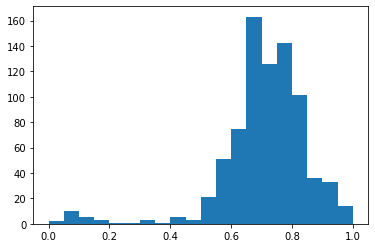

In [22]:
# Histogram of Sleep Quality
plt.hist(sleepdata['Sleep Quality'], bins = 20)
plt.show

In [23]:
# Subsetting the 0% Sleep Quality

sleepdata[sleepdata['Sleep Quality'] < 0.2].shape

(20, 21)

It seems like we have a gap in the histogram, with an increased number of observations below 20% than between 20-40%. 20 observations show less than 20% sleep quality. I think these could be extreme outliers and probably something which we should exclude from the analysis. Let's do the same exercise for 'Regularity' as well.

In [24]:
# Basic summary of the Regularity variable
sleepdata['Regularity'].describe()

count    796.000000
mean       0.838719
std        0.170276
min       -0.730000
25%        0.830000
50%        0.880000
75%        0.920000
max        1.000000
Name: Regularity, dtype: float64

That negative minimum definitely seems weird. Lets see the distribution of Regularity to get a better understanding.

<function matplotlib.pyplot.show(close=None, block=None)>

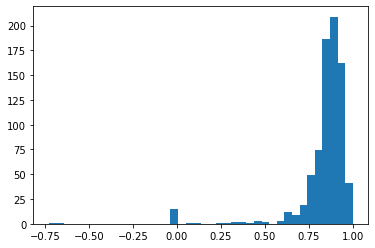

In [25]:
# Histogram of Regularity
plt.hist(sleepdata['Regularity'], bins = 40)
plt.show

In [26]:
# Subsetting the < 1% Regularity

sleepdata[sleepdata['Regularity'] < 0.01].shape

(17, 21)

I think the observations when Regularity is below 1% are erroneous. Along with those where the Sleep Quality is below 20% I will remove.

In [27]:
sleepdata = sleepdata[(sleepdata['Regularity'] > 0.01) & (sleepdata['Sleep Quality'] > 0.2)]
sleepdata.shape

(768, 21)

# Merging the distance and sleepdata datasets

In the following exercice I will merge the 2 datasets, clean them and prepare for visualizations.

In [28]:
# Joining the distance dataset to sleepdata

# Grouping the distance dataset and saving it
seasonal = distance.groupby(['season', 'date'],as_index=False).agg({'km':'sum'})

# Joining the 2 datasets
merged_data = pd.merge(sleepdata, seasonal, how = 'left', left_on = ['Date'], right_on = ['date'])

# Calling head to see the dataset
merged_data.head()

,Date,End,Sleep Quality,Regularity,Mood,Heart rate (bpm),Steps,Alarm mode,Air Pressure (Pa),City,...,Window start,Window stop,Did snore,Snore time,Weather temperature (°C),Weather type,Notes,season,date,km
0,2018-12-29,2018-12-30 07:27:54,0.78,0.88,NaN,0,0,Normal,101.0,Budapest,...,2018-12-30 07:00:00,2018-12-30 07:30:00,True,0.0,2.6,Cloudy,NaN,Winter,2018-12-29,0.992163
1,2018-12-31,2018-12-31 07:29:10,0.65,0.89,NaN,0,0,Normal,100.7,Budapest,...,2018-12-31 07:00:00,2018-12-31 07:30:00,True,0.0,1.2,Sunny,NaN,Winter,2018-12-31,2.312530
2,2019-01-01,2019-01-01 08:08:42,0.75,0.89,NaN,0,0,Normal,101.5,Budapest,...,2019-01-01 07:40:00,2019-01-01 08:10:00,True,0.0,-2.8,Partly cloudy,NaN,Winter,2019-01-01,0.923891
3,2019-01-01,2019-01-02 06:01:06,0.61,0.84,NaN,0,0,Normal,99.9,Budapest,...,2019-01-02 05:30:00,2019-01-02 06:00:00,True,0.0,1.0,Partly cloudy,NaN,Winter,2019-01-01,0.923891
4,2019-01-02,2019-01-03 06:03:09,0.61,0.87,NaN,0,0,Normal,100.4,Budapest,...,2019-01-03 05:35:00,2019-01-03 06:05:00,True,0.0,-2.8,Sunny,NaN,Winter,2019-01-02,1.092220


In [29]:
# Sanity checks and checking the shape
print(merged_data['season'].unique())
merged_data.shape

['Winter' 'Spring' 'Summer' 'Fall' nan]


(768, 24)

In [30]:
# Counting missing values
merged_data.isnull().sum()

Date                             0
End                              0
Sleep Quality                    0
Regularity                       0
Mood                           267
Heart rate (bpm)                 0
Steps                            0
Alarm mode                       0
Air Pressure (Pa)                0
City                           342
Movements per hour               0
Time in bed (seconds)            0
Time asleep (seconds)            0
Time before sleep (seconds)      0
Window start                     2
Window stop                      2
Did snore                        0
Snore time                       0
Weather temperature (°C)         0
Weather type                     0
Notes                          338
season                           3
date                             3
km                               3
dtype: int64

Mood and Notes are fields that manually needs to be inputted after every sleep session, which I seldom did. City is something which I think my iPhone automatically adds, although it seems like in most cases it did not. Window start and Window stop are not something we are interested in. Since we won't analyise these attributes, I don't worry about these for now. 

It seems like in 3 cases the merge function did not find any results in the distance dataset. I think it is possible that on those days I did not have my phone with me, or it is just simply some randomly missing entry. I think I won't affect my data too much if I delete these occurrences.

In [31]:
# Deleting 3 missing values

merged_data.dropna(subset=['season','date','km'], inplace=True)

# Checking if missing values are removed
print(merged_data.isna().sum())

# Checking the shape to ensure we did not get rid of more columns than intended
merged_data.shape

Date                             0
End                              0
Sleep Quality                    0
Regularity                       0
Mood                           264
Heart rate (bpm)                 0
Steps                            0
Alarm mode                       0
Air Pressure (Pa)                0
City                           339
Movements per hour               0
Time in bed (seconds)            0
Time asleep (seconds)            0
Time before sleep (seconds)      0
Window start                     2
Window stop                      2
Did snore                        0
Snore time                       0
Weather temperature (°C)         0
Weather type                     0
Notes                          335
season                           0
date                             0
km                               0
dtype: int64


(765, 24)

# 4. Analysis & Visualizations

In the following exercises I will use visualizations and basic statistics to answer the questions pitted in the beginning of this notebook. I will use mainly the merged_data, but I will also use the subsets I created and saved.

In [32]:
yearly_distance

,km
year,
2016,1428.012951
2017,1619.677883
2018,985.373128
2019,1184.758224
2020,713.882366


Text(0.5, 1.0, 'Kilometers Tracked By Year - 2016 - 2020')

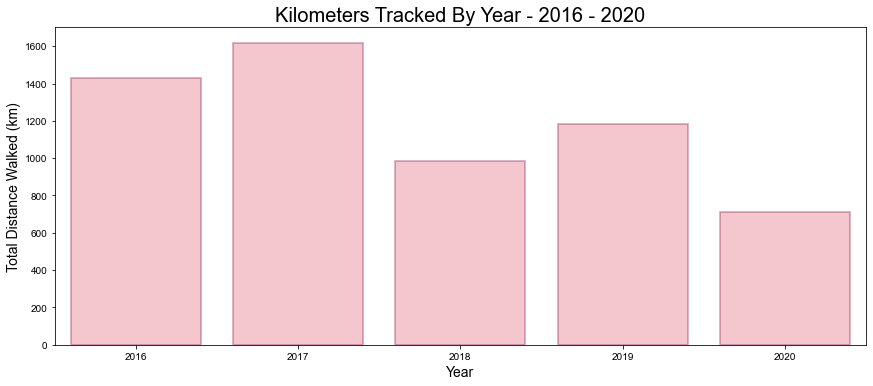

In [33]:
# How much do I walk yearly - yearly?

fig, ax = plt.subplots(figsize=(12,5))
fig.tight_layout()

sns.set_context(rc = {'patch.linewidth': 2})
sns.set_style('whitegrid')

ax = sns.barplot(data = yearly_distance.reset_index(), x = 'year', y = 'km', color = '#F62A4E', alpha = 0.3, edgecolor = '#900C3F')
ax.set_xlabel('Year', fontsize = 14)
ax.set_ylabel('Total Distance Walked (km)', fontsize = 14)
ax.set_title('Kilometers Tracked By Year - 2016 - 2020', fontsize = 20)



How much do I walk regularly, on a yearly basis?
It seems like I usually walk around 1000kms per year, with 2016 and 2017 being my most active years (i.e. covering the most distance), while 2020 being my least active year. In my best year, in 2017 I walked more than 1600kms, while in 2020 I covered less than half of that distance. It seems that in the last 3 years the distance I covered walking is much lower than the 2 years before. 

In 2018 I broke my leg and spent 1.5 months in bed and hospitals - which explains the low distance that year. 
In 2019 I started using my car more often.
In 2020 the pandemic and the consequent stay at home orders and self quarantine caused a significant reduction of the amount I walked in and around the city.

I carry my iPhone with me at all times, whenever I leave the house, so I can assume that these figures are in line with reality and there are no difference due to changes in my habits.

In [34]:
daily_distance.head()

,date,km
233,2016-01-01,2.108070
234,2016-01-02,4.896458
235,2016-01-03,2.050260
236,2016-01-04,3.931100
237,2016-01-05,4.883320


Text(0.5, 1.0, 'Summary statistics of distance walked each day - 2016 - 2020')

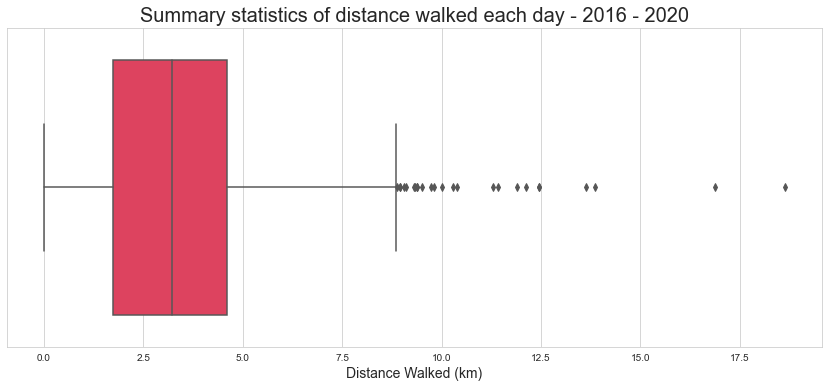

In [35]:
# Summary of days walked all time

fig, ax = plt.subplots(figsize=(12,5))
fig.tight_layout()
sns.set_style('whitegrid')

ax = sns.boxplot(data = daily_distance, x = 'km', color = '#F62A4E')
ax.set_xlabel('Distance Walked (km)', fontsize = 14)
ax.set_title('Summary statistics of distance walked each day - 2016 - 2020', fontsize = 20)

In [36]:
# Calculating main metrics for daily distances

print('Min: ', round(daily_distance['km'].min(), 3))
print('Median: ', round(daily_distance['km'].median(), 2))
print('Mean: ', round(daily_distance['km'].mean(), 2))
print('Max: ', round(daily_distance['km'].max(), 2))

Min:  0.005
Median:  3.22
Mean:  3.32
Max:  18.63


Of all the days where I have recorded data of the distance I covered while walking, the maximum distance I covered was 18.6km, while the least amount was 5 meters. Interestingly my mean (3.3km) and median (3.2km) are quite close to each other, which usually indicates that there are numerous no extreme outliers.

Text(0.5, 1.0, 'Distribution of distance walked each day - 2016 - 2020')

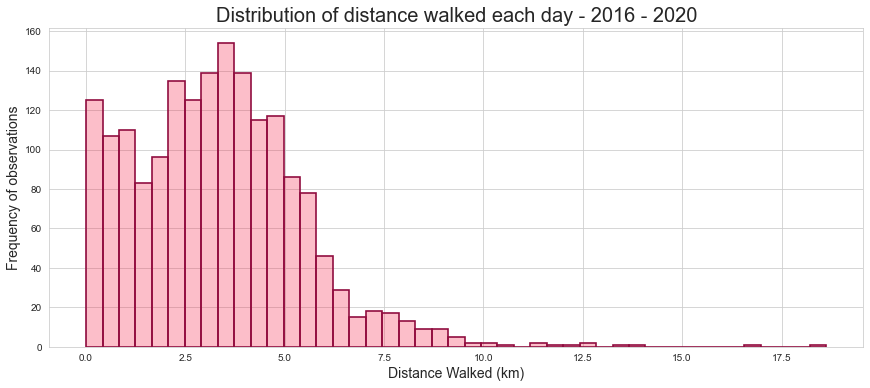

In [37]:
# Plotting the distribution of distances covered for all days

fig, ax = plt.subplots(figsize=(12,5))
fig.tight_layout()
sns.set_style('whitegrid')
sns.set_context(rc = {'patch.linewidth': 2})

ax = sns.histplot(daily_distance['km'], color = '#F62A4E', alpha = 0.3, edgecolor = '#900C3F', bins = 45)
ax.set_xlabel('Distance Walked (km)', fontsize = 14)
ax.set_ylabel('Frequency of observations', fontsize = 14)
ax.set_title('Distribution of distance walked each day - 2016 - 2020', fontsize = 20)

The histogram shows a skewed distribution to the right. A distribution skewed to the right is said to be positively skewed. This kind of distribution has a large number of occurrences in the lower value cells (left side) and few in the upper value cells (right side). A skewed distribution can result when data is gathered from a system with has a boundary such as zero. In other words, all the collected data has values greater than zero, which is the case for the walking distance dataset (no negatove distance is possible).

We only have a few numbers of outliers on the right side (higher numbers). These are most probably hiking, sightseeing and otherwise walking heavy exercise filled days.

Text(0.5, 1.0, 'Average Distance Covered On Each Day Of The Week - 2016 - 2020')

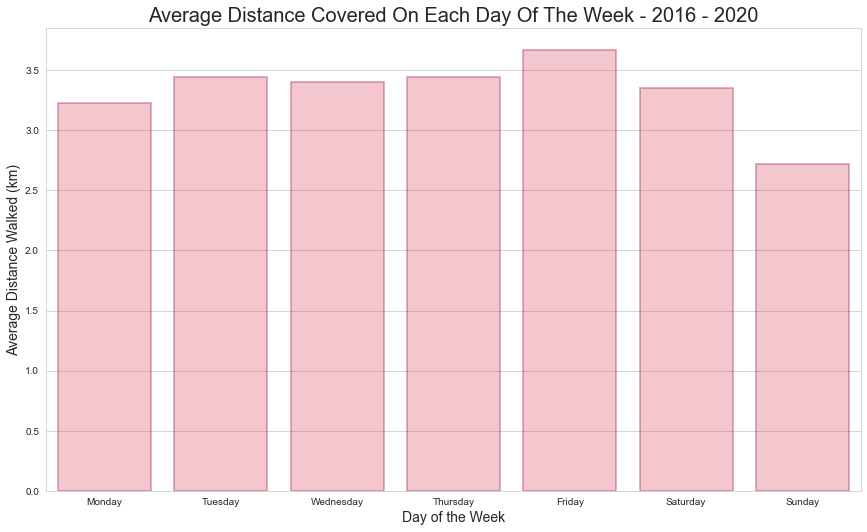

In [38]:
# Do I walk more on the weekends?

fig, ax = plt.subplots(figsize=(12,7))
fig.tight_layout()

sns.set_context(rc = {'patch.linewidth': 2})
sns.set_style('whitegrid')

ax = sns.barplot(data = distance_weekdays, x = 'day', y = 'km', color = '#F62A4E', alpha = 0.3, edgecolor = '#900C3F')
ax.set_xlabel('Day of the Week', fontsize = 14)
ax.set_ylabel('Average Distance Walked (km)', fontsize = 14)
ax.set_title('Average Distance Covered On Each Day Of The Week - 2016 - 2020', fontsize = 20)

Observing the average distance I walked on each day of the week in the past 4 years, the only trend we can see is that on Sundays I walk significantly less than on any other day of the week. It seems like on Fridays I tend to cover a bit more ground than on other days.

Text(0.5, 1.0, 'Summary statistics of Sleep Quality - 2018 - 2021')

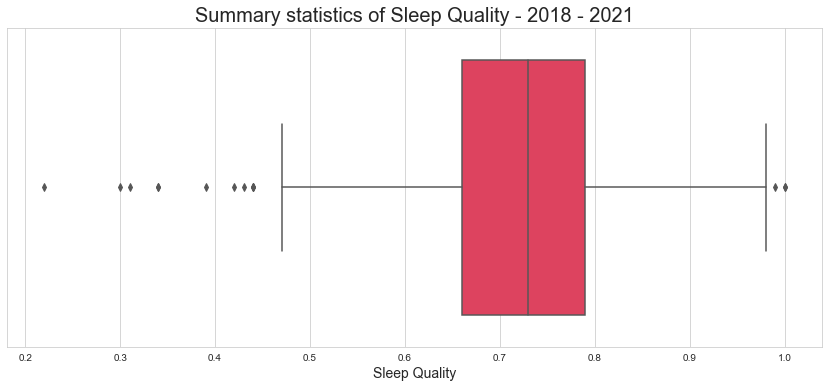

In [43]:
# How do I sleep usually? Looking at the Sleep Quality

fig, ax = plt.subplots(figsize=(12,5))
fig.tight_layout()
sns.set_style('whitegrid')

ax = sns.boxplot(data = merged_data, x = 'Sleep Quality', color = '#F62A4E')
ax.set_xlabel('Sleep Quality', fontsize = 14)
ax.set_title('Summary statistics of Sleep Quality - 2018 - 2021', fontsize = 20)

In [42]:
# Calculating the basic statistics for Sleep Quality

print('Min: ', round(merged_data['Sleep Quality'].min(), 3))
print('Median: ', round(merged_data['Sleep Quality'].median(), 2))
print('Mean: ', round(merged_data['Sleep Quality'].mean(), 2))
print('Max: ', round(merged_data['Sleep Quality'].max(), 2))

Min:  0.22
Median:  0.73
Mean:  0.73
Max:  1.0


My worst sleep session had a Sleep Quality indicator of .22, while the best one had 1. Interestingly the mean and median for my Sleep Quality is the same at .73, which indicates that there are not too many extreme outliers, which the plot also confirms.

Text(0.5, 1.0, 'Summary statistics of Sleep Quality per Season - 2018 - 2021')

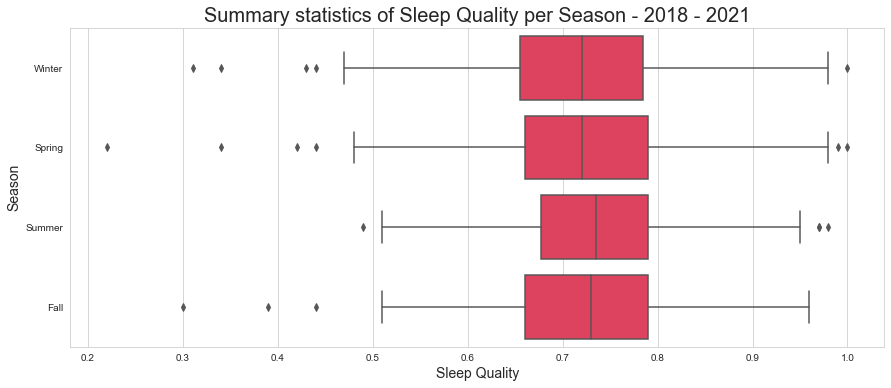

In [45]:
# Does my sleep quality differ based on seasons?

fig, ax = plt.subplots(figsize=(12,5))
fig.tight_layout()
sns.set_style('whitegrid')

ax = sns.boxplot(data = merged_data, x = 'Sleep Quality', y = 'season', color = '#F62A4E')
ax.set_xlabel('Sleep Quality', fontsize = 14)
ax.set_ylabel('Season', fontsize = 14)
ax.set_title('Summary statistics of Sleep Quality per Season - 2018 - 2021', fontsize = 20)

There does not seem to be extreme difference in my sleep quality across the different seasons. The only thing that stands out is that generally there are very few outliers (observations outside of the IQR), and that the IQR is wider in the winter and spring time, compared to the other two seasons.

Text(0.5, 1.0, 'Summary statistics of Regularity - 2018 - 2021')

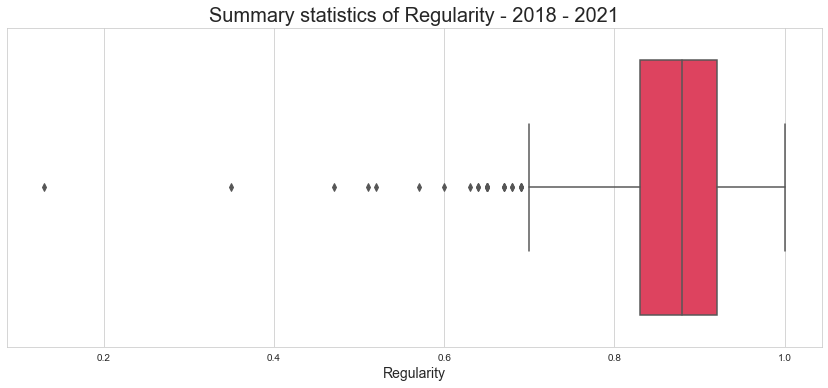

In [46]:
# Analysing Sleep Regularity

fig, ax = plt.subplots(figsize=(12,5))
fig.tight_layout()
sns.set_style('whitegrid')

ax = sns.boxplot(data = merged_data, x = 'Regularity', color = '#F62A4E')
ax.set_xlabel('Regularity', fontsize = 14)
ax.set_title('Summary statistics of Regularity - 2018 - 2021', fontsize = 20)

In [47]:
# Calculating the basic statistics for Sleep Quality

print('Min: ', round(merged_data['Regularity'].min(), 3))
print('Median: ', round(merged_data['Regularity'].median(), 2))
print('Mean: ', round(merged_data['Regularity'].mean(), 2))
print('Max: ', round(merged_data['Regularity'].max(), 2))

Min:  0.13
Median:  0.88
Mean:  0.87
Max:  1.0


My mean sleep Regularity in the time period is .87 while the median Regularity is .88, so these figures are also very close to each other, with not too many outliers.

Text(0.5, 1.0, 'Summary statistics of Regularity per Season - 2018 - 2021')

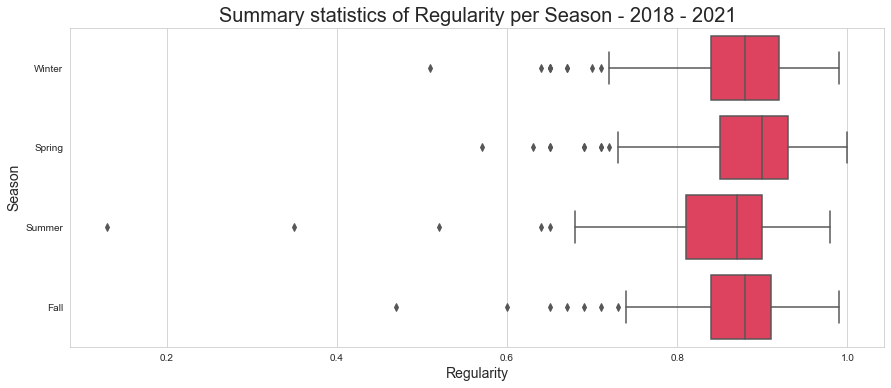

In [48]:
# Does my sleep regularity differ based on seasons?

fig, ax = plt.subplots(figsize=(12,5))
fig.tight_layout()
sns.set_style('whitegrid')

ax = sns.boxplot(data = merged_data, x = 'Regularity', y = 'season', color = '#F62A4E')
ax.set_xlabel('Regularity', fontsize = 14)
ax.set_ylabel('Season', fontsize = 14)
ax.set_title('Summary statistics of Regularity per Season - 2018 - 2021', fontsize = 20)

It seems like my median sleep regularity is better in spring and fall, and I have more extreme outliers in summertime.

Text(0.5, 1.0, 'Correlation of Distance Walked (km) and Sleep Quality - with distributions')

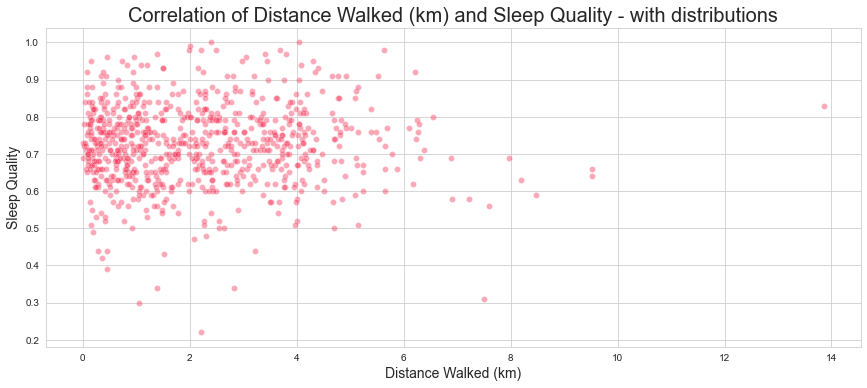

In [67]:
# How does distance walked correlate with sleep quality?

fig, ax = plt.subplots(figsize=(12,5))
fig.tight_layout()
sns.set_style('whitegrid')

ax = sns.scatterplot(data = merged_data, x = 'km', y = 'Sleep Quality', color = '#F62A4E', alpha = 0.4)
ax.set_xlabel('Distance Walked (km)', fontsize = 14)
ax.set_ylabel('Sleep Quality', fontsize = 14)
ax.set_title('Correlation of Distance Walked (km) and Sleep Quality - with distributions', fontsize = 20)


There does not seem to be a relationship between the distance walked on a given day and the consequent sleep quality on the same evening. Let's see if there are any patterns if we look at it across the different seasons.

Text(0.5, 0.98, 'ONE TITLE FOR ALL')

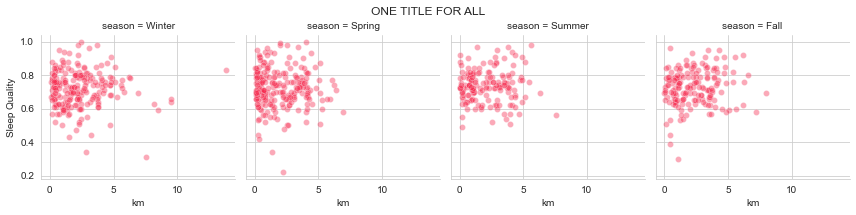

In [80]:
# Scatterplot across the different seasons

g = sns.FacetGrid(merged_data, col = 'season')
g.map(sns.scatterplot, 'km', 'Sleep Quality', color = '#F62A4E',alpha = 0.4)

g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Relationship Between Distance Walked and Sleep Quality')


There still does not seem to be a releationship between my walking distance, and how well I sleep that evening.

Text(0.5, 1.0, 'Correlation of Distance Walked (km) and Sleep Regularity - with distributions')

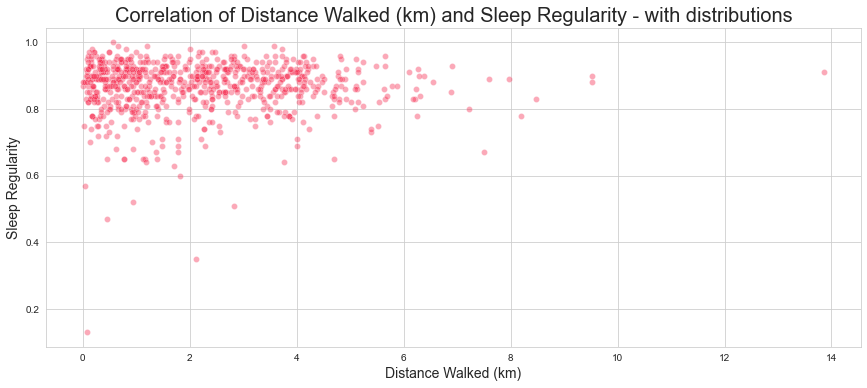

In [85]:
# How does distance walked correlate with sleep regularity?

fig, ax = plt.subplots(figsize=(12,5))
fig.tight_layout()
sns.set_style('whitegrid')

ax = sns.scatterplot(data = merged_data, x = 'km', y = 'Regularity', color = '#F62A4E', alpha = 0.4)
ax.set_xlabel('Distance Walked (km)', fontsize = 14)
ax.set_ylabel('Sleep Regularity', fontsize = 14)
ax.set_title('Correlation of Distance Walked (km) and Sleep Regularity - with distributions', fontsize = 20)

Text(0.5, 0.98, 'Relationship Between Distance Walked and Sleep Regularity')

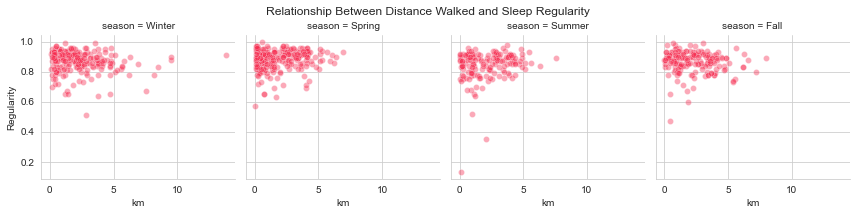

In [84]:
# Scatterplot across the different seasons of distance and sleep regularity

g = sns.FacetGrid(merged_data, col = 'season')
g.map(sns.scatterplot, 'km', 'Regularity', color = '#F62A4E',alpha = 0.4)

g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Relationship Between Distance Walked and Sleep Regularity')


Similarly to Sleep Quality it seems as though there is no relationship between my walking distance and the regularity of my sleep, even by looking at it across the different seasons.

After this quick, high level analysis, my hipothesis would be that my walking activity has no serious effect on my sleeping habits. It would be interesting to dig deeper into the data, understand the outliers better, investigate further to see if the observations for both walking distance and sleeping habits are sensible or if there may be some kind of underlying, systemic bias, simply due to the fact that these observations were automatically recorded with my iPhone without any quality checks or reviews.

My main goal with this exercise was to practice my data importing and cleaning skills, as well as practice how to handle different types of data, merge them together, and also, to put together some simple, yet interesting and useful visualizations about basic statistics and relationships.